# Adding Distractions to Task Trials

### Imports

In [21]:
import sys
sys.path.append('../')

import os
import shutil
import glob
import json

from wisdom import make
from wisdom import read_write
import wisdom.envs.shapenet.task_generator as tg

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Environment

In [16]:
task_dir = 'outputs/tasks/comp_loc_task.json'
frame_trial_output_dir = 'outputs/trials/frame_distract'
temporal_trial_output_dir = 'outputs/trials/temporal_distract'
stim_dir = '../data/shapenet_handpicked'

# Remake trials directory
if os.path.exists(frame_trial_output_dir):
    shutil.rmtree(frame_trial_output_dir)
os.makedirs(frame_trial_output_dir)
if os.path.exists(temporal_trial_output_dir):
    shutil.rmtree(temporal_trial_output_dir)
os.makedirs(temporal_trial_output_dir)

# Create environment
env = make(
    env_id='ShapeNet',
    dataset_fp=stim_dir
)

# Initialize environment
print(env.env_spec.auto_gen_config)

{'op_dict': {'Select': {'n_downstream': 4, 'downstream': ['GetLoc', 'GetCategory', 'GetObject'], 'same_children_op': False, 'min_depth': 1, 'min_op': 1}, 'GetCategory': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetLoc': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetObject': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'IsSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'NotSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'And': {'n_downstream': 2, 'downstream': ['IsSame', 'NotSame', 'And', 'Or'], 'same_children_op': False, 'min_de

### Load A Task 
- See [/individual_task_gen.ipynb](https://github.com/BashivanLab/iWISDM/tree/main/tutorials/individual_task_gen.ipynb) for comp_loc_task.json creation. 

In [17]:
comp_loc_task = tg.read_task('outputs/tasks/comp_loc_task.json')

### Generate 10 Trials with Frame Distractions
- A frame distration is an extra object within a task-relevant trial frame.
- **add_distractor_frame**: This parameter controls the desired maximum number of frame distractions to be generated 

In [18]:
# Generate trials from tasks
for i in range(10):
    trials = env.generate_trials(tasks=[comp_loc_task], mode='train', add_distractor_frame=1)
    imgs, _, info_dict = trials[0]
    read_write.write_trial(imgs, info_dict, frame_trial_output_dir + f'/trial{i}')

#### Show example trial

instruction  observe object 1, delay, observe object 2 with category: couches, location of object 2 equals location of object 1?
answers:  ['null', 'null', 'null', 'null', 'false']


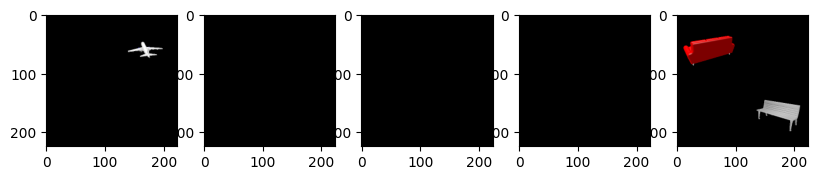

In [22]:
images = []

for img_path in sorted(glob.glob(frame_trial_output_dir + '/trial0/frames/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10

for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)

with open(frame_trial_output_dir + '/trial0/frames/task_info.json') as f:
    trial_info = json.load(f)

print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])

### Generate 10 Trials with Temporal Distractions
- A temporal distration is an extra object within a delay frame (task-irrelevant trial frame).
- **add_distractor_time**: This parameter controls the desired maximum number of temporal distractions to be generated 

In [19]:
# Generate trials from tasks
for i in range(10):
    trials = env.generate_trials(tasks=[comp_loc_task], mode='train', add_distractor_time=1)
    imgs, _, info_dict = trials[0]
    read_write.write_trial(imgs, info_dict, temporal_trial_output_dir + f'/trial{i}')

#### Show example trial

instruction  observe object 1, delay, observe object 2, observe object 3, location of object 3 equals location of object 1?
answers:  ['null', 'null', 'null', 'null', 'true']


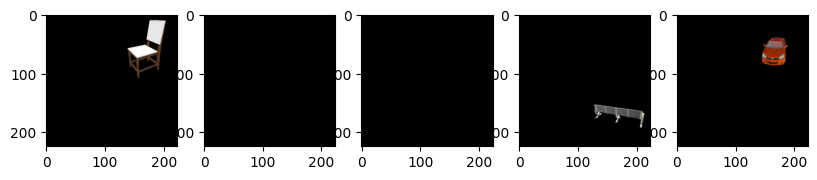

In [23]:
images = []

for img_path in sorted(glob.glob(temporal_trial_output_dir + '/trial0/frames/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10

for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)

with open(temporal_trial_output_dir + '/trial0/frames/task_info.json') as f:
    trial_info = json.load(f)

print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])